# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 575


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1


# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather.get("coord", {}).get("lat")
        city_lng = city_weather.get("coord", {}).get("lon")
        city_max_temp = city_weather.get("main", {}).get("temp_max")
        city_humidity = city_weather.get("main", {}).get("humidity")
        city_clouds = city_weather.get("clouds", {}).get("all")
        city_wind = city_weather.get("wind", {}).get("speed")
        city_country = city_weather.get("sys", {}).get("country")
        city_date = city_weather.get("dt")

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tofol
Processing Record 2 of Set 1 | kaintragarh
Processing Record 3 of Set 1 | playa del ingles
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | lazaro cardenas
Processing Record 6 of Set 1 | chervonohrad
Processing Record 7 of Set 1 | revelstoke
Processing Record 8 of Set 1 | nar'yan-mar
Processing Record 9 of Set 1 | vernon
Processing Record 10 of Set 1 | port lincoln
Processing Record 11 of Set 1 | badger
Processing Record 12 of Set 1 | coquimbo
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | siwa oasis
Processing Record 15 of Set 1 | ust'-kalmanka
Processing Record 16 of Set 1 | slavutych
Processing Record 17 of Set 1 | stanley
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | seaside
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | codrington
Processing Record 22 of Set 1 | kital

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tofol,5.3248,163.0078,28.83,79.0,100.0,6.80,FM,1.717017e+09
1,kaintragarh,20.7167,84.5333,31.63,60.0,14.0,2.31,IN,1.717017e+09
2,playa del ingles,27.7567,-15.5787,21.44,77.0,8.0,1.79,ES,1.717017e+09
3,ushuaia,-54.8000,-68.3000,3.81,81.0,75.0,8.23,AR,1.717017e+09
4,lazaro cardenas,17.9583,-102.2000,31.53,50.0,2.0,5.54,MX,1.717017e+09


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tofol,5.3248,163.0078,28.83,79.0,100.0,6.80,FM,1.717017e+09
1,kaintragarh,20.7167,84.5333,31.63,60.0,14.0,2.31,IN,1.717017e+09
2,playa del ingles,27.7567,-15.5787,21.44,77.0,8.0,1.79,ES,1.717017e+09
3,ushuaia,-54.8000,-68.3000,3.81,81.0,75.0,8.23,AR,1.717017e+09
4,lazaro cardenas,17.9583,-102.2000,31.53,50.0,2.0,5.54,MX,1.717017e+09


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

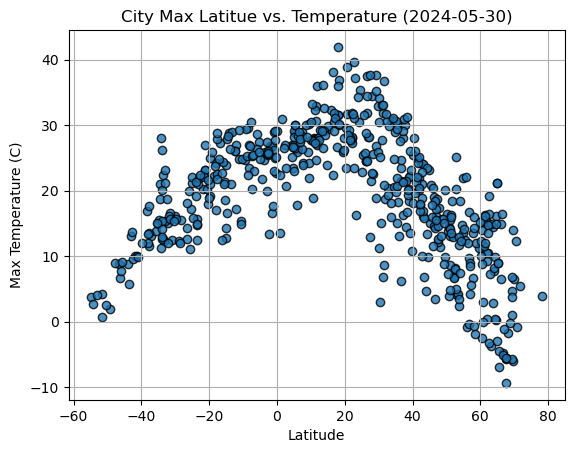

In [91]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor = "black", linewidth = 1, marker= 'o', alpha =0.8, label = "Cities")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitue vs. Temperature ({date})")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

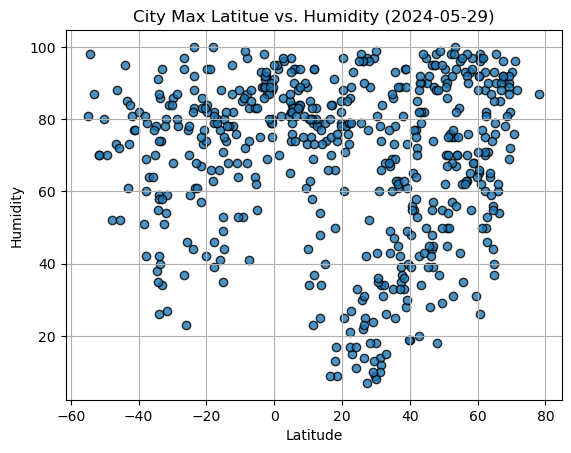

In [35]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor = "black", linewidth = 1, marker= 'o', alpha =0.8, label = "Cities")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitue vs. Humidity ({date})")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

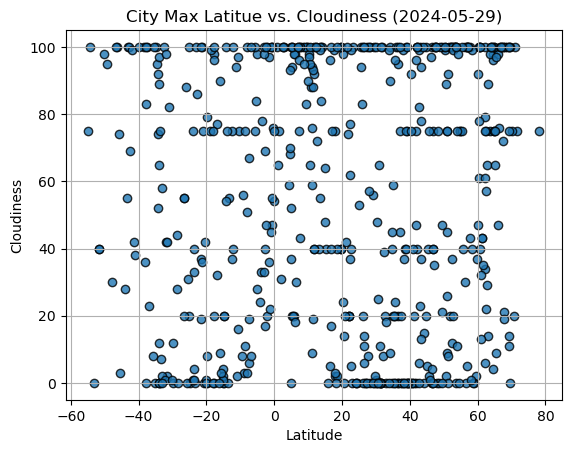

In [34]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor = "black", linewidth = 1, marker= 'o', alpha =0.8, label = "Cities")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitue vs. Cloudiness ({date})")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

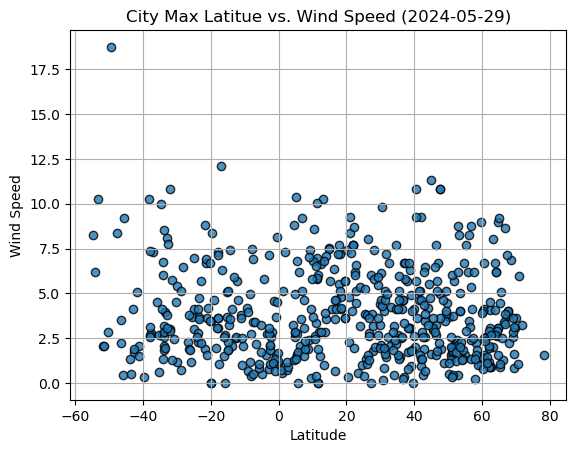

In [33]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor = "black", linewidth = 1, marker= 'o', alpha =0.8, label = "Cities")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitue vs. Wind Speed ({date})")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [102]:
# Define a function to create Linear Regression plots
def linear_regresion(x,y, y_label, xy_vals):
    (slope, intercept, r_value, p_value, std_err) = linregress(x, y)
    print(f'The r-value  is:  {r_value}')

    #build the scatter plot with the linear regresion
    plt.scatter(x, y)
    #create the linear regresion equation m = slope, b = interception and plotting
    m, b = np.polyfit(x,y, 1)
    plt.plot(x, m*x+b, color = "red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    y_string = f"y= {m:.2f}x + {b:.2f}" 
    plt.annotate(y_string, xy_vals, fontsize = 12, color = "red")
    plt.show()
    

In [39]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tofol,5.3248,163.0078,28.83,79.0,100.0,6.80,FM,1.717017e+09
1,kaintragarh,20.7167,84.5333,31.63,60.0,14.0,2.31,IN,1.717017e+09
2,playa del ingles,27.7567,-15.5787,21.44,77.0,8.0,1.79,ES,1.717017e+09
4,lazaro cardenas,17.9583,-102.2000,31.53,50.0,2.0,5.54,MX,1.717017e+09
5,chervonohrad,50.3910,24.2351,13.77,91.0,99.0,3.70,UA,1.717017e+09


In [40]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,ushuaia,-54.8000,-68.3000,3.81,81.0,75.0,8.23,AR,1.717017e+09
9,port lincoln,-34.7333,135.8667,15.55,78.0,100.0,9.97,AU,1.717017e+09
11,coquimbo,-29.9533,-71.3436,16.12,68.0,0.0,1.19,CL,1.717017e+09
12,edinburgh of the seven seas,-37.0676,-12.3116,13.08,64.0,23.0,7.28,SH,1.717017e+09
17,waitangi,-43.9535,-176.5597,8.79,95.0,28.0,1.34,NZ,1.717017e+09


###  Temperature vs. Latitude Linear Regression Plot

The r-value  is:  -0.7698187608138908


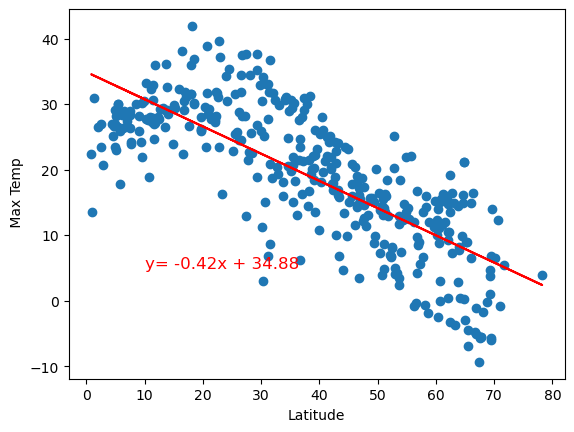

In [105]:
# Linear regression on Northern Hemisphere
linear_regresion(northern_hemi_df["Lat"], northern_hemi_df['Max Temp'], " Max Temp", (10,5))

The r-value  is:  0.7985771763891495


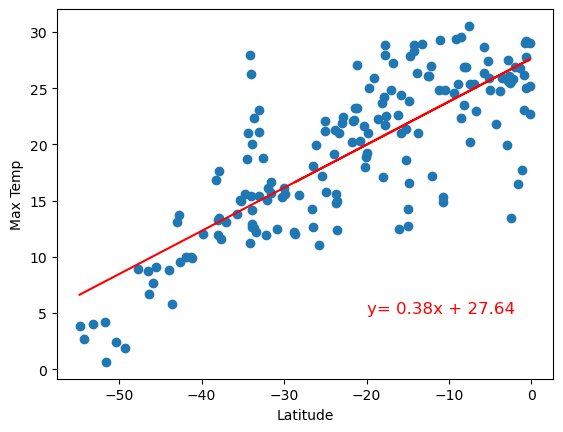

In [106]:
# Linear regression on Southern Hemisphere
linear_regresion(southern_hemi_df["Lat"], southern_hemi_df['Max Temp'], "Max Temp", (-20,5))

**Discussion about the linear relationship:** 
In the first Graphic there is negative relationship between the Latitude and the Max Temperature, as the latitude increases the temperatures decreases, meaning those places further north of the equator is cooler than those close to the equator.

For the southern hemisphere is the opposite, as the latitude decreases the temperatures also decreases, meaning there is a positive relationship for these two variable
s.


### Humidity vs. Latitude Linear Regression Plot

The r-value  is:  0.07328209536677507


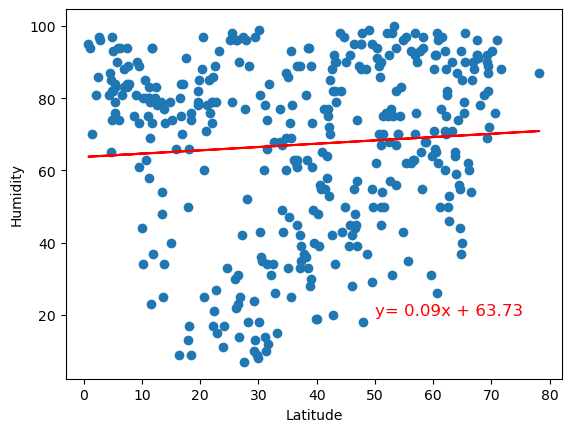

In [108]:
# Northern Hemisphere
linear_regresion(northern_hemi_df["Lat"], northern_hemi_df['Humidity'], "Humidity", (50,20))

The r-value  is:  0.2273016817138414


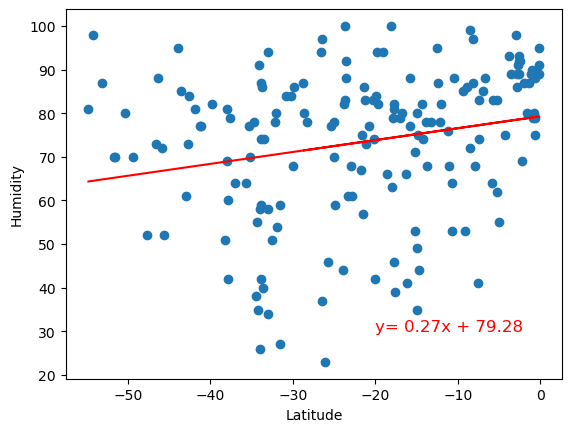

In [109]:
# Southern Hemisphere
linear_regresion(southern_hemi_df["Lat"], southern_hemi_df['Humidity'], "Humidity", (-20,30))

**Discussion about the linear relationship:** 

There is no relationship between latitude and humidity in neither of the two hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value  is:  0.005290823568399005


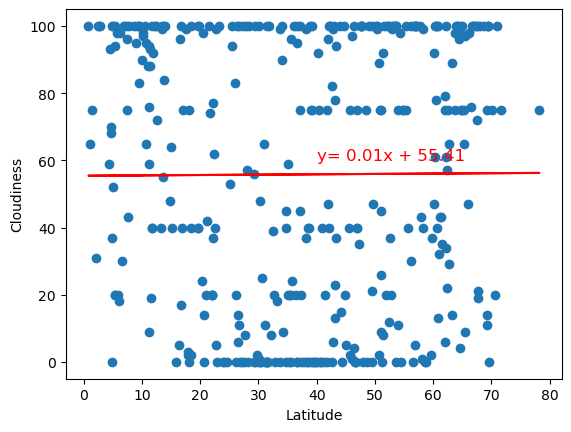

In [110]:
# Northern Hemisphere
linear_regresion(northern_hemi_df["Lat"], northern_hemi_df['Cloudiness'], "Cloudiness", (40,60))

The r-value  is:  -0.01310570990565433


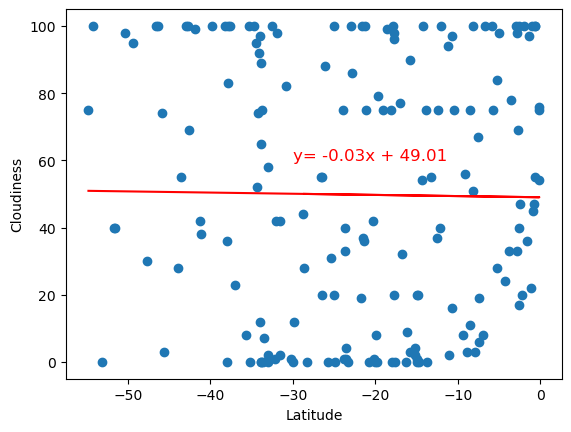

In [112]:
# Southern Hemisphere
linear_regresion(southern_hemi_df["Lat"], southern_hemi_df['Cloudiness'], "Cloudiness", (-30,60))

**Discussion about the linear relationship:** 

There is no relationship between latitude and cloudiness in neither of the two hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value  is:  -0.11756512480304376


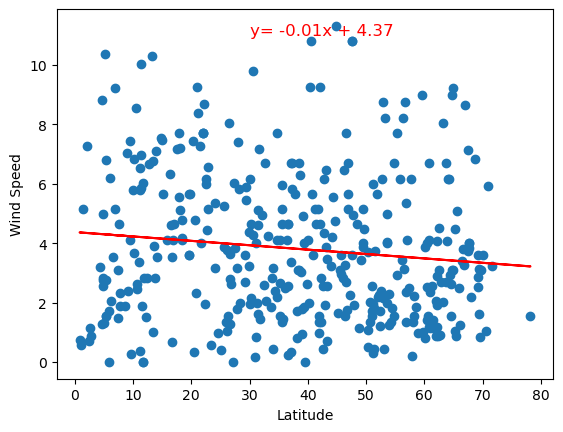

In [113]:
# Northern Hemisphere
linear_regresion(northern_hemi_df["Lat"], northern_hemi_df['Wind Speed'], "Wind Speed", (30,11))

The r-value  is:  -0.2510421470278646


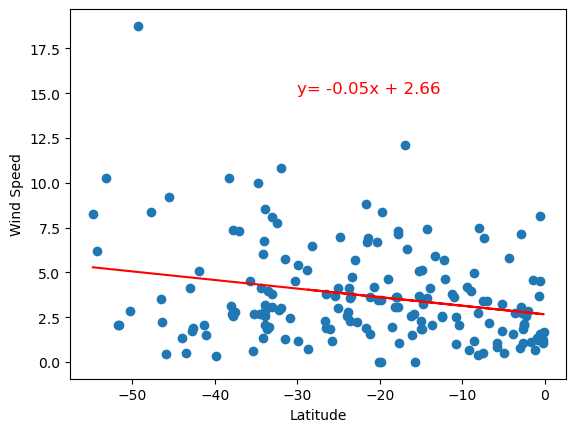

In [114]:
# Southern Hemisphere
linear_regresion(southern_hemi_df["Lat"], southern_hemi_df['Wind Speed'], "Wind Speed", (-30,15))

**Discussion about the linear relationship:** 
There is no relationship between latitude and Wind speed in neither of the two hemispheres.